In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from matplotlib import rcParams


In [62]:
#Cargamos el dataframe y nos interiorizamos de sus campos
#Que no haya una columna que se llame 'Unnamed: 0'

encuesta = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/analisis_datos/teoria_y_practica/03-plots/data_nps.csv", encoding= "latin-1")
encuesta = encuesta.drop(columns = ["Unnamed: 0"])
encuesta.dropna()


,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS
0,2021-06-11 10:30:03 UTC,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...
1,2021-06-10 10:30:03 UTC,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...
3,2021-06-10 10:30:03 UTC,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia
4,2021-05-31 10:30:03 UTC,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia
5,2021-06-04 10:30:02 UTC,2021-06-06 18:03:57 UTC,2,M,1978-09-29 00:00:00 UTC,18454077,42.0,COMODORO RIVADAVIA,Purchase,5616941,2021-06-03 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Atencion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,2021-05-10 10:30:03 UTC,2021-05-10 11:26:43 UTC,5,M,1983-01-25 00:00:00 UTC,23818832,38.0,REMEDIOS DE ESCALADA,Documentation Request,5436556,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,10,atr Eficacia mot Atencion
15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza
15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...
15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...


In [63]:
#imprimir lo de abajo
encuesta.tail()

,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS
15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza
15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...
15997,2021-05-10 10:30:03 UTC,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN
15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...
15999,2021-05-10 10:39:05 UTC,2021-05-10 12:02:05 UTC,0,F,1965-11-22 00:00:00 UTC,8703935,55.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5426739,2021-05-07 00:00:00 UTC,SUCURSAL,Automotores Individuales,8,mot Servicio


In [64]:
#mostrar nombres de columna
encuesta.columns


Index(['CREATION_DATE', 'RESPONSE_DATE', 'CURRENT_STATUS', 'GENDER',
       'DAY_OF_BIRTH', 'CIF_ID', 'AGE', 'LOCATION', 'TOUCHPOINT_NUMBER',
       'CASE_NUMBER', 'CASE_DATE', 'CASE_CHANNEL', 'PRODUCT_NAME', 'NPS_SCORE',
       'TAGS'],
      dtype='object')

Hacer una función que determine si es promotor, detractor y neutro e implementarla a una columna del dataset que se llama nps_segment
* Promotor: NPS_SCORE = 8,9,10
* Neutro: NPS_SCORE = 6,7
* Detractor: NPS_SCORE = 1,2,3,4,5

In [65]:
def nps_segment(x):
      if x <= 5:
          return 'Detractor'
      elif 6 <= x <= 7:
          return 'Neutro'
      else:
          return 'Promotor'

encuesta["nps_segment"] = encuesta["NPS_SCORE"].apply(nps_segment)

#df["nombre_de_la_columna_nueva"] = df["Columna_a_transformar"].apply(función_creada_por_nosotros)


In [66]:
encuesta["nps_segment"]

0        Detractor
1         Promotor
2         Promotor
3         Promotor
4        Detractor
           ...    
15995     Promotor
15996       Neutro
15997       Neutro
15998    Detractor
15999     Promotor
Name: nps_segment, Length: 16000, dtype: object

In [67]:
#imprimir nans en la columna TAGS
encuesta["TAGS"].isna().sum()

2184

Con numpy.where crear una columna llamada detected, que determina si la columna TAGS tiene algun contenido. Poner True si lo tiene y si no tiene contenido poner False.

In [98]:
#Escribi tu código acá (HINT: Buscar numpy where documentacion)

# encuesta["detected"] = np.where(encuesta["TAGS"].isna(), "Ninguna", encuesta["TAGS"])

encuesta["detected"] = encuesta["TAGS"].notnull()
print(encuesta["detected"])

0         True
1         True
2        False
3         True
4         True
         ...  
15995     True
15996     True
15997    False
15998     True
15999     True
Name: detected, Length: 16000, dtype: bool


In [99]:
encuesta

,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment,detected,year_month,grupo_edad
0,2021-06-11 10:30:03 UTC,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...,Detractor,True,2021-06,60+
1,2021-06-10 10:30:03 UTC,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...,Promotor,True,2021-06,<30
2,2021-06-07 10:30:03 UTC,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN,Promotor,False,2021-06,40-49
3,2021-06-10 10:30:03 UTC,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia,Promotor,True,2021-06,60+
4,2021-05-31 10:30:03 UTC,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia,Detractor,True,2021-05,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza,Promotor,True,2021-05,40-49
15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...,Neutro,True,2021-05,60+
15997,2021-05-10 10:30:03 UTC,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN,Neutro,False,2021-05,60+
15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...,Detractor,True,2021-05,60+


___

## Dates
Devolver la fecha máxima y minima de la columna CREATION_DATE

In [69]:
print(encuesta["CREATION_DATE"].max())

2021-06-15 12:35:01 UTC


In [70]:
print(encuesta["CREATION_DATE"].min())

2020-12-10 10:30:03 UTC


Chequear los data types de todas las columnas

In [71]:
print(encuesta.dtypes)

CREATION_DATE         object
RESPONSE_DATE         object
CURRENT_STATUS         int64
GENDER                object
DAY_OF_BIRTH          object
CIF_ID                 int64
AGE                  float64
LOCATION              object
TOUCHPOINT_NUMBER     object
CASE_NUMBER            int64
CASE_DATE             object
CASE_CHANNEL          object
PRODUCT_NAME          object
NPS_SCORE              int64
TAGS                  object
nps_segment           object
detected                bool
dtype: object


¿Cual es el data type de CREATION_DATE ¿Te parece correct?

##### NO. Debería de ser de type 'datetime64'

Crear una columna que solo tenga año y mes. Llameémosle year_month. Utilizar pd.to_datetime() primero y luego to period

In [72]:
pd.to_datetime(encuesta["CREATION_DATE"]).dt.to_period("M")

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_28494/3354722290.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pd.to_datetime(encuesta["CREATION_DATE"]).dt.to_period("M")


0        2021-06
1        2021-06
2        2021-06
3        2021-06
4        2021-05
          ...   
15995    2021-05
15996    2021-05
15997    2021-05
15998    2021-05
15999    2021-05
Name: CREATION_DATE, Length: 16000, dtype: period[M]

In [73]:
#armar el código para crear la columna año mes

encuesta["year_month"] = pd.to_datetime(encuesta["CREATION_DATE"]).dt.to_period("M")
print(encuesta["year_month"])


0        2021-06
1        2021-06
2        2021-06
3        2021-06
4        2021-05
          ...   
15995    2021-05
15996    2021-05
15997    2021-05
15998    2021-05
15999    2021-05
Name: year_month, Length: 16000, dtype: period[M]


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_28494/4125265796.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  encuesta["year_month"] = pd.to_datetime(encuesta["CREATION_DATE"]).dt.to_period("M")


___

## Conteo.
Crear un nuevo dataframe agrupado por year_month donde tenga la cantidad de encuestas únicas mes a mes
** Hint**:
```python
df.groupby(grouping_column).agg("count")
```

In [74]:
encuesta.groupby("year_month").agg("count") # No cuenta los NAN, por eso difieren los valores por fila.

,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment,detected
year_month,,,,,,,,,,,,,,,,,
2020-12,124,124,124,123,123,124,123,124,124,124,124,124,124,124,111,124,124
2021-01,2617,2617,2617,2612,2612,2617,2612,2610,2617,2617,2617,2617,2617,2617,2246,2617,2617
2021-02,2433,2433,2433,2427,2426,2433,2426,2428,2433,2433,2433,2433,2433,2433,2139,2433,2433
2021-03,3308,3308,3308,3294,3294,3308,3294,3297,3308,3308,3308,3308,3308,3308,2866,3308,3308
2021-04,2883,2883,2883,2868,2868,2883,2868,2876,2883,2883,2883,2883,2883,2883,2466,2883,2883
2021-05,3066,3066,3066,3051,3051,3066,3051,3055,3066,3066,3066,3066,3066,3066,2632,3066,3066
2021-06,1569,1569,1569,1562,1562,1569,1562,1568,1569,1569,1569,1569,1569,1569,1356,1569,1569


Crear un dataste donde sume la cantidad de encuestas con TAG detectados, mes a mes

**Hint** :
```python
df.groupby(grouping_column).agg(
    new_col_name =  ('old_col_name', 'sum'),
    new_col_name_2 = ('old_col_name', 'mean')
)
```

In [75]:
encuesta.groupby("year_month").agg(
                            cantidad_encuestas_con_tag = ("detected", "sum")
                            )

,cantidad_encuestas_con_tag
year_month,
2020-12,111
2021-01,2246
2021-02,2139
2021-03,2866
2021-04,2466
2021-05,2632
2021-06,1356


Crear otro dataset donde tenga la cantidad de encuestas por nps_segment unicas por mes. promotoras, neutras y detractoras.

In [103]:
# Crear otro dataset donde tenga la cantidad de encuestas por nps_segment unicas por mes. promotoras, neutras y detractoras.

encuesta_por_segmento = encuesta.groupby(["year_month", "nps_segment"]).agg(
                                                                            cantidad_encuestas_unicas = ("CIF_ID", "nunique"),
                                                                            )
encuesta_por_segmento


cantidad_encuestas_unicas
year_month nps_segment                           
2020-12    Detractor                           16
           Neutro                               8
           Promotor                           100
2021-01    Detractor                          408
           Neutro                             180
           Promotor                          2028
2021-02    Detractor                          472
           Neutro                             162
           Promotor                          1799
2021-03    Detractor                          553
           Neutro                             261
           Promotor                          2494
2021-04    Detractor                          416
           Neutro                             206
           Promotor                          2260
2021-05    Detractor                          430
           Neutro                             212
           Promotor                          2421
2021-06    Detractor                          219
           Neutro                             100
           Promotor                          1249

___

# Barras
Crear un dataste_por_segemento con el total de encuestas de CIF_ID unico por nps_segment. Hacer un gráfico de barras con el total de encuestas por nps_segment

In [77]:
# Crear un dataset que agrupe por segmento los CIF_ID únicos

# encuesta_por_segmento.info()


In [105]:
#reset_index() implementalo al dataset y asignaselo

encuesta_por_segmento = encuesta.groupby('nps_segment')['CIF_ID'].nunique().reset_index()
encuesta_por_segmento


,nps_segment,CIF_ID
0,Detractor,2467
1,Neutro,1117
2,Promotor,11892


Cantidad que hay por detractor, promotor y neutro

In [106]:
# Cantidad que hay por detractor, promotor y neutro

encuesta.value_counts("nps_segment")

nps_segment
Promotor     12356
Detractor     2515
Neutro        1129
Name: count, dtype: int64

___

# Countplot
Hacer un countplot por la cantidad de NPS segment

In [80]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63","#a50026", "#fee08b"]

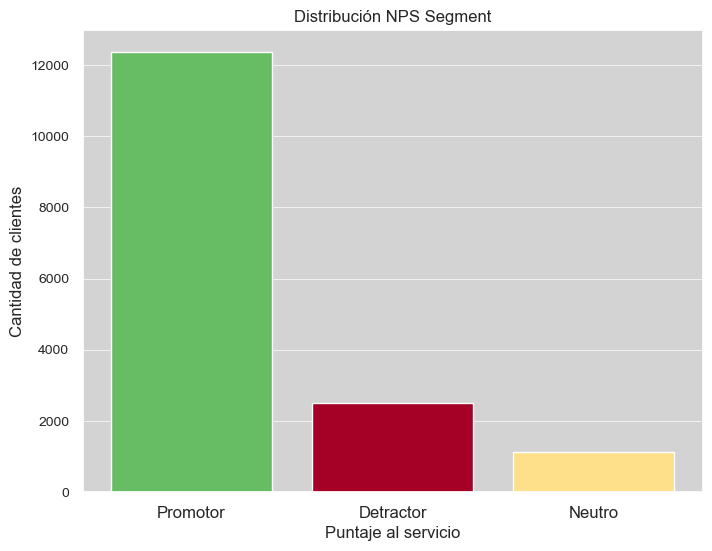

In [81]:
# hacelo matplot.pyplot.grid

plt.figure(figsize=(8,6))
plt.bar(encuesta["nps_segment"].value_counts().index, encuesta["nps_segment"].value_counts(), color = paleta, edgecolor = "white")
plt.xlabel("Puntaje al servicio")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución NPS Segment")
plt.gca().set_facecolor('lightgray')
plt.grid(axis="y", linestyle='-', linewidth=0.5, color="white", zorder=0)
plt.grid(axis="x", linestyle='-', linewidth=0.5, color="lightgray", zorder=0)
plt.xticks(fontsize=12)



plt.show()


In [82]:
#imprimir las cantidades en porcentajes

encuesta["nps_segment"].value_counts(normalize = True)

print("Porcentajes de Promotores en la muestra:", encuesta["nps_segment"].value_counts(normalize = True)["Promotor"]*100, "%")
print("Porcentajes de Detractores en la muestra:", encuesta["nps_segment"].value_counts(normalize = True)["Detractor"]*100, "%")
print("Porcentajes de Neutros en la muestra:", encuesta["nps_segment"].value_counts(normalize = True)["Neutro"]*100, "%")



Porcentajes de Promotores en la muestra: 77.225 %
Porcentajes de Detractores en la muestra: 15.71875 %
Porcentajes de Neutros en la muestra: 7.05625 %


___

# Crosstab

Armar un crostab por year_month en el index y NPS segment cómo columna

In [83]:
pd.crosstab(encuesta["year_month"], encuesta["nps_segment"])


nps_segment,Detractor,Neutro,Promotor
year_month,,,
2020-12,16,8,100
2021-01,409,180,2028
2021-02,472,162,1799
2021-03,553,261,2494
2021-04,416,206,2261
2021-05,430,212,2424
2021-06,219,100,1250


¿Para que sirve esta tabla?

##### Para ver la cantidad de encuestas por mes y por segmento

Armar en terminos relativos. Es decir, en porcentaje de total por mes.

In [109]:
encuesta_segmento_porcentaje = pd.crosstab(encuesta["year_month"], encuesta["nps_segment"], normalize = "index")*100
encuesta_segmento_porcentaje

nps_segment,Detractor,Neutro,Promotor
year_month,,,
2020-12,12.903226,6.451613,80.645161
2021-01,15.628582,6.878105,77.493313
2021-02,19.399918,6.658446,73.941636
2021-03,16.717050,7.889964,75.392987
2021-04,14.429414,7.145335,78.425251
2021-05,14.024788,6.914547,79.060665
2021-06,13.957935,6.373486,79.668579


___

# Lineplot

En el eje x gráfica el mes y en el eje y tres lineas con detractor, neutro y promotor

Armar un cross tab con los comentarios detectados mes a mes

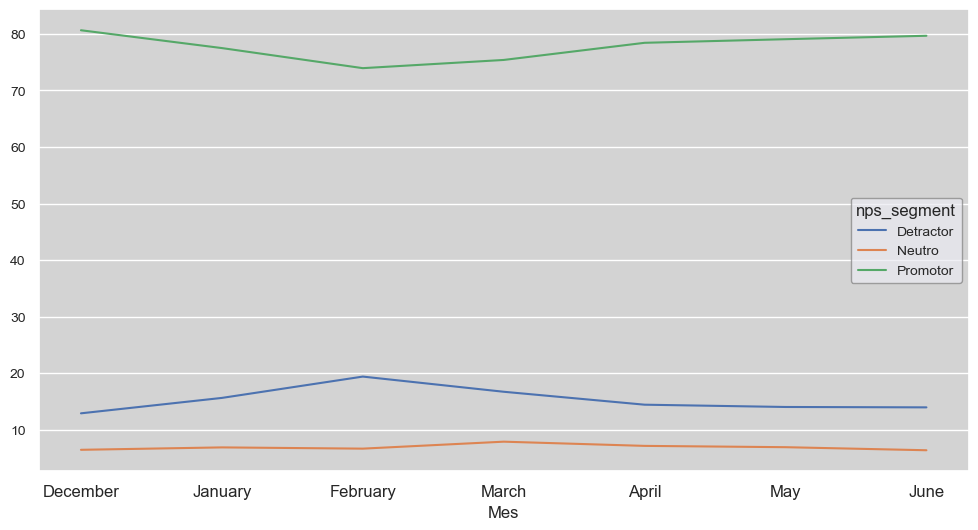

In [85]:
# Crea el gráfico de líneas
plt.figure(figsize=(12, 6))

# Extrae solo el nombre del mes de cada elemento del índice
meses = [idx.strftime('%B') for idx in encuesta_segmento_porcentaje.index]

# Para cada segmento, crea una línea en el gráfico
for segmento in encuesta_segmento_porcentaje.columns:
    plt.plot(meses, encuesta_segmento_porcentaje[segmento], label=segmento)

# Personaliza el gráfico con etiquetas, título, leyenda, etc.
plt.xlabel('Mes')
plt.ylabel('')
plt.xticks(fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.gca().set_facecolor('lightgray')
plt.grid(axis="x", linestyle='-', linewidth=0.5, color="lightgray", zorder=0)
sns.set_style("darkgrid")
plt.legend(loc="best", fontsize=10, frameon=True, facecolor="#EAEAF1", edgecolor="grey", fancybox=True, framealpha=0.7, title="nps_segment")

plt.show()


¿Que mes es en el que más falla? ¿podemos sacar una conclusión?

___

# Case Channel

Reproducí este gráfico. ¿Para qué sirve?

HINT:

plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = df, x = 'CASE_CHANNEL',
              order = df['CASE_CHANNEL'].value_counts().index)

Text(0.5, 1.0, 'Cantidad de casos por Case Channel')

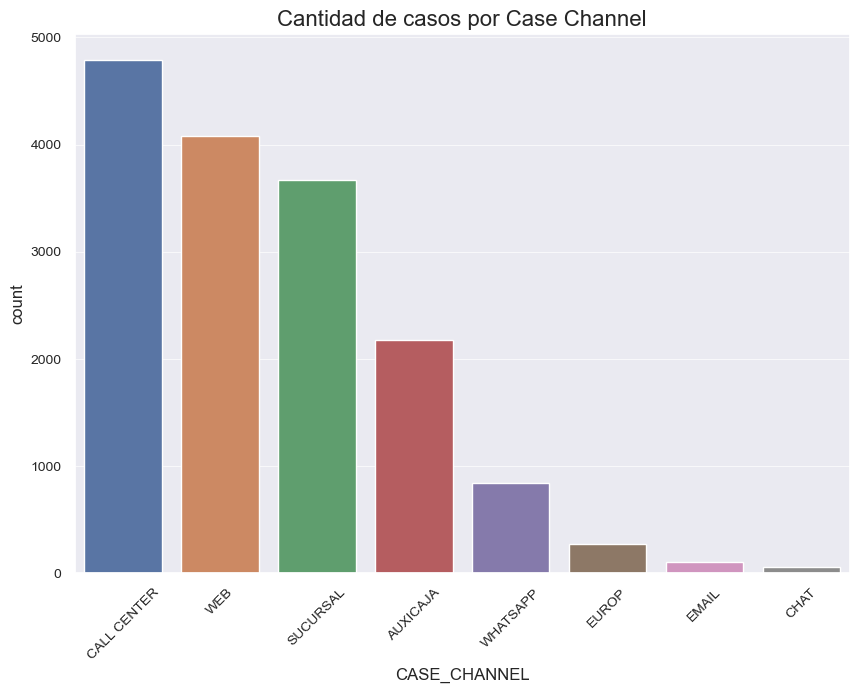

In [86]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.gca().set_facecolor('#EAEAF1')
ax = sns.countplot(data = encuesta, x = 'CASE_CHANNEL',
              order = encuesta['CASE_CHANNEL'].value_counts().index, edgecolor = "white")
plt.grid(axis="y", linestyle='-', linewidth=0.5, color="white", zorder=0)
plt.title("Cantidad de casos por Case Channel", fontsize=16)

Instala la librería squarify y ejecuta la linea de código de aca abajo importala y

Text(0.5, 1.0, 'Cantidad de casos por CASE_CHANNEL')

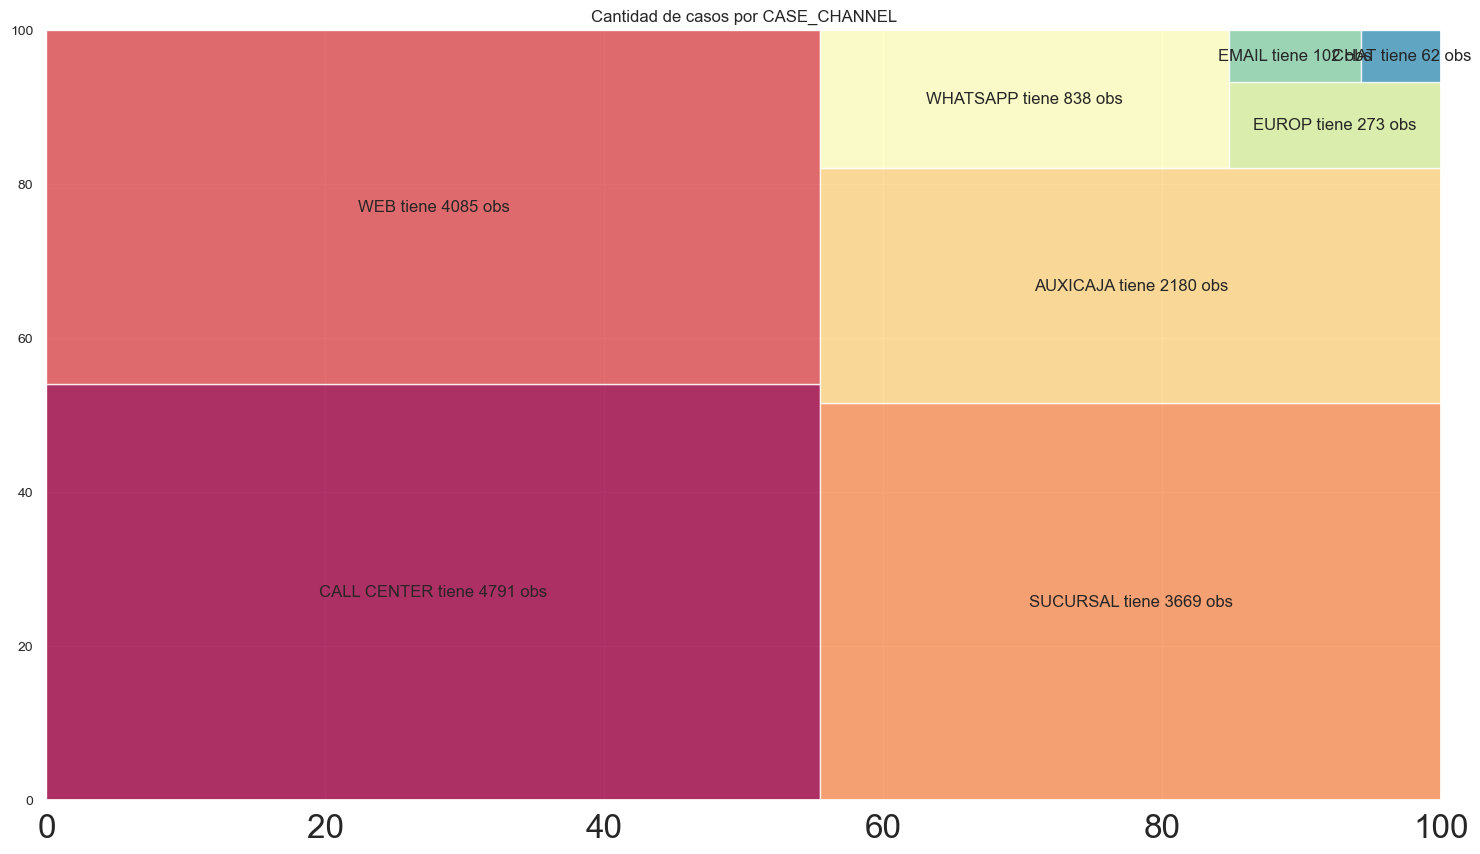

In [87]:
import squarify

#filtro = df[df['CASE_CHANNEL'].map(df['CASE_CHANNEL'].value_counts()) > 900]
label_value = encuesta["CASE_CHANNEL"].value_counts().to_dict()
# Creo los labels usando a list comprehesion
labels = ["{} tiene {} obs".format(class_, obs) for class_, obs in label_value.items()]
# Creo colores por cantidad de trabajos
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 10))
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)
plt.title("Cantidad de casos por CASE_CHANNEL")



Crear un cross tab entre segmento y Case chanel

In [88]:
# Crear un cross tab entre encuesta_segmento_porcentaje Y CASE CHANNEL

cross_table_2 = pd.crosstab(encuesta["CASE_CHANNEL"], encuesta["nps_segment"], normalize = "index")*100
cross_table_2 = cross_table_2.reset_index()
cross_table_2


nps_segment,CASE_CHANNEL,Detractor,Neutro,Promotor
0,AUXICAJA,9.220183,4.770642,86.009174
1,CALL CENTER,12.126905,6.553955,81.319140
2,CHAT,32.258065,11.290323,56.451613
3,EMAIL,27.450980,3.921569,68.627451
4,EUROP,22.710623,9.523810,67.765568
5,SUCURSAL,17.525211,7.795040,74.679749
6,WEB,17.747858,7.392901,74.859241
7,WHATSAPP,30.429594,10.262530,59.307876


___

# Plotea un gráfico de barras

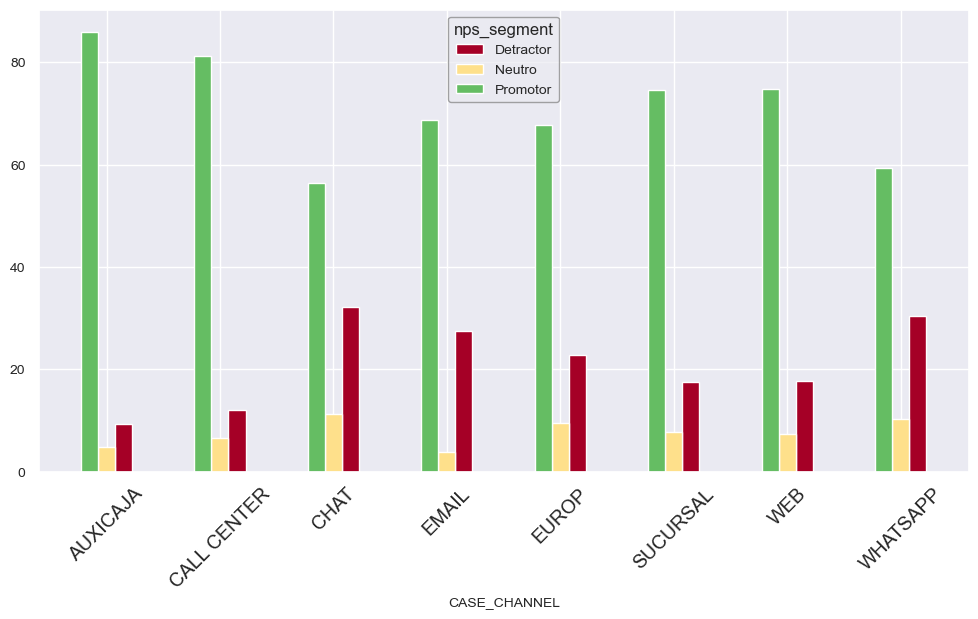

In [89]:
plt.figure(figsize=(12, 6))

data = cross_table_2

n = len(data)
x = list(range(n))  # Convert the range to a list
width = 0.25

plt.bar([i + (width-0.1) for i in x], data['Detractor'], width=width-0.1, label='Detractor', color='#A50026')
plt.bar(x, data['Neutro'], width=width-0.1, label='Neutro', color='#FEE08B')
plt.bar([i - (width-0.1) for i in x], data['Promotor'], width=width-0.1, label='Promotor', color='#65BD63')

plt.xticks(x, data['CASE_CHANNEL'], rotation=45, fontsize=14)
plt.xlabel('CASE_CHANNEL', fontsize=10)

plt.legend(loc="upper center", fontsize=10, frameon=True, facecolor="#EAEAF1", edgecolor="grey", fancybox=True, framealpha=0.7, title="nps_segment")
sns.set_style("darkgrid")

plt.show()


### Crear un crostab de nps_segment por genero en porcentaje

In [90]:
# Crear un crosstab de nps_segment por genero en porcentaje

cross_table_3 = pd.crosstab(encuesta["nps_segment"], encuesta["GENDER"], normalize = "index")*100
cross_table_3

GENDER,F,M
nps_segment,,
Detractor,31.297405,68.702595
Neutro,30.570410,69.429590
Promotor,34.118603,65.881397


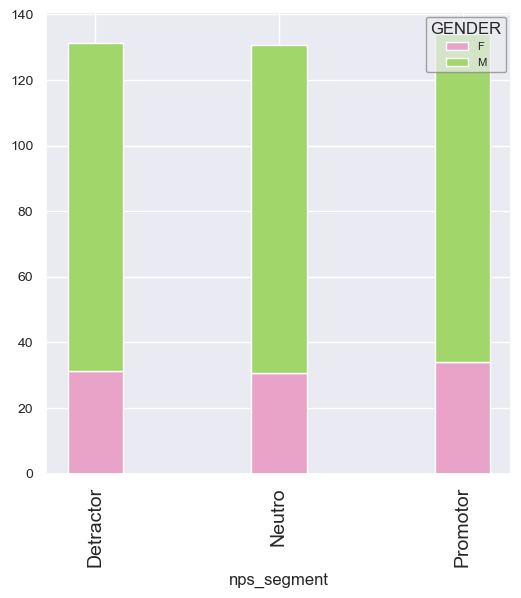

In [91]:

# Sumar los datos de género para crear una categoría 'Male' y una categoría 'Female'
cross_table_3['Male'] = cross_table_3['M'] + cross_table_3['F']
cross_table_3['Female'] = cross_table_3['F']

# Eliminar las columnas originales de género 'F' y 'M'
cross_table_3.drop(columns=['F', 'M'], inplace=True)

# Reordenar las columnas para que 'Female' aparezca antes que 'Male'
cross_table_3 = cross_table_3[['Female', 'Male']]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(6, 6))

# Extraer los datos
nps_segment = cross_table_3.index
female_data = cross_table_3['Female'].values
male_data = cross_table_3['Male'].values

# Barras para el género Female
plt.bar(nps_segment, female_data, label='F', color='#E9A3C9', width=0.3)

# Barras para el género Male
plt.bar(nps_segment, male_data, bottom=female_data, label='M', color='#A1D66A', width=0.3)


plt.xlabel('nps_segment')
plt.legend(loc="best", fontsize=8, frameon=True, facecolor="#EAEAF1", edgecolor="grey", fancybox=True, framealpha=0.7, title="GENDER")
plt.xticks(rotation=90, fontsize=14)

plt.show()


___

# Edad

Imprimir los siguientes valores

In [92]:
print("Edad Max:", encuesta["AGE"].max())
print("Mediana de la edad:", encuesta["AGE"].median())
print("Promedio de la edad:", encuesta["AGE"].mean())
print("Edad Min:", encuesta["AGE"].min())

Edad Max: 121.0
Mediana de la edad: 51.0
Promedio de la edad: 51.15010040160642
Edad Min: 0.0


Graficar la distribución de la edad

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_28494/4091694513.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(encuesta["AGE"], bins=121, kde=False, color="#647A86", hist_kws={"alpha": 1})


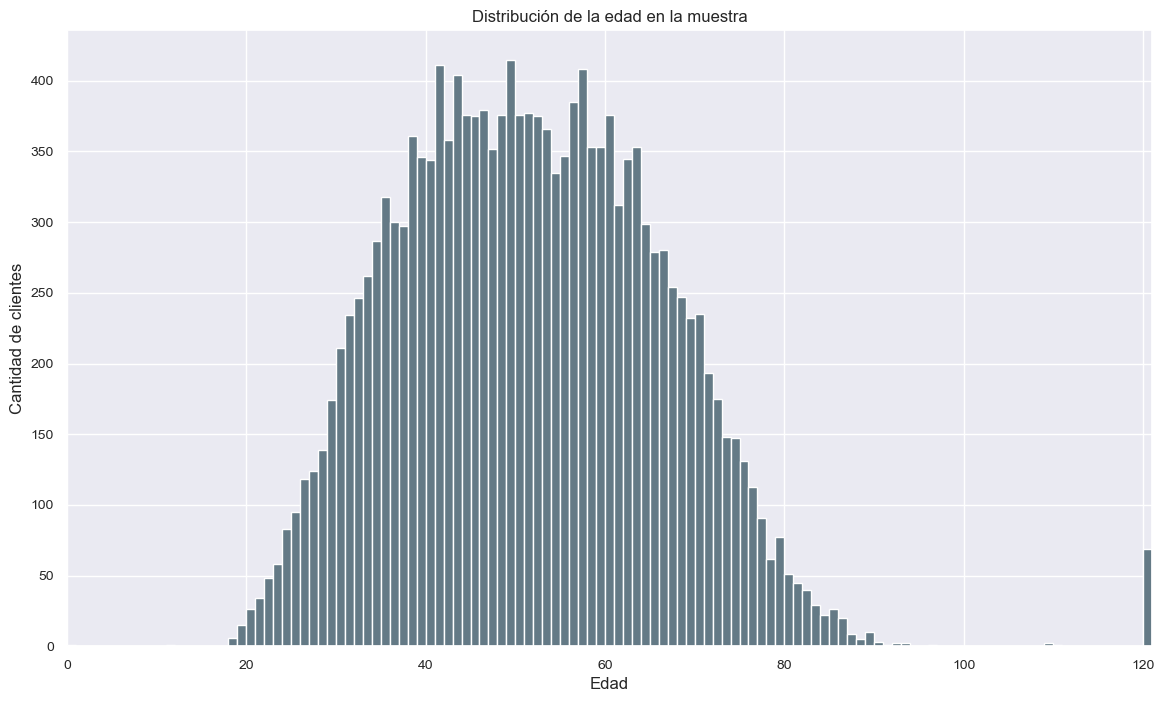

In [93]:

rcParams['figure.figsize'] = 14, 8

sns.set()
sns.distplot(encuesta["AGE"], bins=121, kde=False, color="#647A86", hist_kws={"alpha": 1})

plt.xlabel("Edad")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de la edad en la muestra")
plt.xlim(encuesta["AGE"].min(), encuesta["AGE"].max())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


___

# Boxplot

Armar un boxplot por segmento, representando en el eje Y la edad.

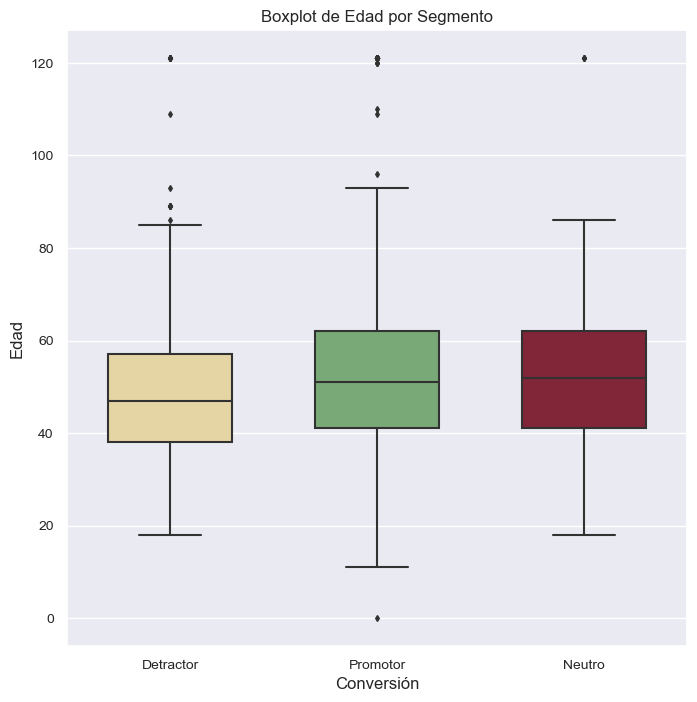

In [94]:
paleta = ["#F0D999", "#71B16E", "#901631"]

plt.figure(figsize=(8, 8))

sns.set()
sns.boxplot(x=encuesta["nps_segment"], y=encuesta["AGE"], palette=paleta, linewidth=1.5, width=0.6, fliersize=3)

plt.xlabel("Conversión")
plt.ylabel("Edad")
plt.title("Boxplot de Edad por Segmento")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.set_style("darkgrid")

plt.show()


___

# Discretización
Representar la edad en grupos de deacadas

In [95]:
#primero crear la columna según regla de edad
#luego crosstab

def grupo_edad(x):
    if x < 30:
        return '<30'
    elif 30 <= x < 40:
        return '30-39'
    elif 40 <= x < 50:
        return '40-49'
    elif 50 <= x < 60:
        return '50-59'
    else:
        return '60+'

    
encuesta["grupo_edad"] = encuesta["AGE"].apply(grupo_edad)
encuesta["grupo_edad"].value_counts()



grupo_edad
60+      4751
40-49    3790
50-59    3675
30-39    2862
<30       922
Name: count, dtype: int64

In [96]:
per_edad = pd.crosstab(encuesta['nps_segment'],encuesta['grupo_edad'])
per_edad = per_edad.T
per_edad

nps_segment,Detractor,Neutro,Promotor
grupo_edad,,,
30-39,571,184,2107
40-49,662,254,2874
50-59,560,274,2841
60+,537,359,3855
<30,185,58,679


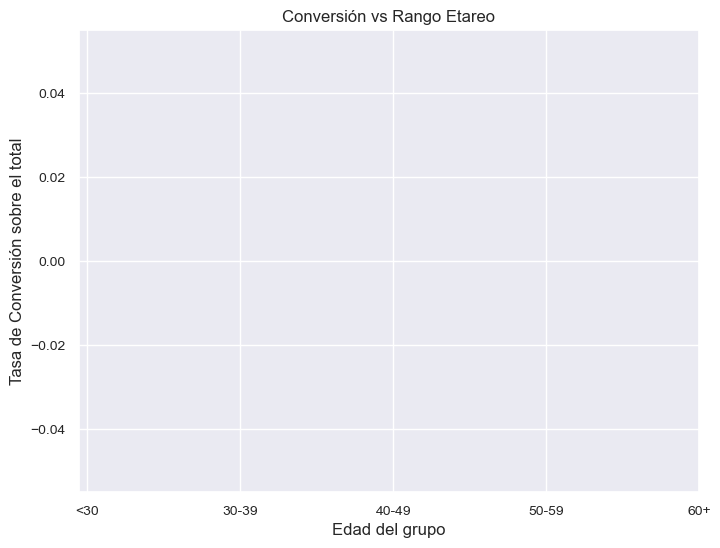

In [97]:
rcParams['figure.figsize'] = 8,6
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_style("darkgrid")
plt.plot(kind = 'bar',color = paleta)
plt.xlabel('Edad del grupo')
plt.ylabel('Tasa de Conversión sobre el total')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Conversión vs Rango Etareo')
plt.show()